
# Resolução do desafio do Programa Trainee triggo.ai

## Introdução
O notebook desenvolvido apresenta a resolução do teste técnico para o Programa Trainee da triggo.ai. O desafio consiste em analisar dados de um dataset de um e-commerce utilizando python.


## 1. Preparação dos Dados

#### Importar os arquivos CSV do dataset

No código abaixo importo os módulos necessários para realizar o desafio como também os arquivos csv do dataset.

In [20]:
# importando modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
import seaborn as sns

from matplotlib.ticker import FuncFormatter

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Definindo o caminho padrao dos datasets
path = './dataset/'

# Carregando os datasets
clientes = pd.read_csv(path + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(path + 'olist_geolocation_dataset.csv')
pedidos_items = pd.read_csv(path + 'olist_order_items_dataset.csv')
pedidos_pagamento = pd.read_csv(path + 'olist_order_payments_dataset.csv')
pedidos_avaliacao = pd.read_csv(path + 'olist_order_reviews_dataset.csv')
pedidos = pd.read_csv(path + 'olist_orders_dataset.csv')
produtos = pd.read_csv(path + 'olist_products_dataset.csv')
vendedores = pd.read_csv(path + 'olist_sellers_dataset.csv')
categorias = pd.read_csv(path + 'product_category_name_translation.csv')

#### Realizar a limpeza necessária (tratar valores nulos, remover duplicatas, etc.)

O codigo abaixo realiza a limpeza necessária.

In [21]:
# cria uma lista com todos os dataframes
dfs = [clientes, geolocation, pedidos_items, pedidos_pagamento, pedidos_avaliacao, pedidos, produtos, vendedores, categorias]


# Remover duplicatas de cada tabela
for i, df in enumerate(dfs):
    dfs[i] = df.drop_duplicates()

# Preencher valores nulos de cada coluna, se for do tipo o object preenche com unknown ou ser for de outro tipo como por exemplo, numérico ou data preenche com zero.
def preencher(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df.loc[:, col] = df[col].fillna('unknown')
        else:
            df.loc[:, col] = df[col].fillna(0)
    return df

# faz o preenchimento a cada DataFrame
dfs = [preencher(df) for df in dfs]



#### Fazer a normalização de colunas quando necessário

Não achei necessário realizar essa parte do desafio agora, pois farei isso para os desafios que realmente precisam, caso contrário algumas normalizacoes poderiam ficar inutilizadas.

#### Criar um modelo relacional e conectar as tabelas adequadamente
Utilizarei a mesma resposta só que com adicional: Não achei necessário realizar essa parte do desafio agora, pois farei isso para os desafios que realmente precisam, pois poderia unificar a base em um único dataframe, mas isso pode gerar um dataframe gigantesco que pode causar problemas de desempenho e integridade, também geraria um uso excessivo de memória.

#### Descrever os passos de preparação dos dados adotados

##### 1. Importar os arquivos CSV do dataset.
Os módulos necessários para concluir o desafio foram importados e os arquivos CSV do dataset foram importados usando pandas.

##### 2. Realizar a limpeza necessária (tratar valores nulos, remover duplicatas, etc.).
Foram removidas duplicatas em todas as tabelas como também os valores nulos foram tratados.

##### 3. Fazer a normalização de colunas quando necessário.
Decidi não realizar essa tarefa agora, pois realizarei em algum desafio CASO NECESSÁRIO.

##### 4. Criar um modelo relacional e conectar as tabelas adequadamente.
Decidi não realizar essa tarefa agora, pois realizarei o merge necessário de algumas tabelas somente na necessidade de cada desafio.


## 2. Análise Exploratória de Dados

#### a) Qual o volume de pedidos por mês? Existe sazonalidade nas vendas?

Existe sazonalidade, os picos regulares acontecem ao fim do ano nos meses de novembro e dezembro.

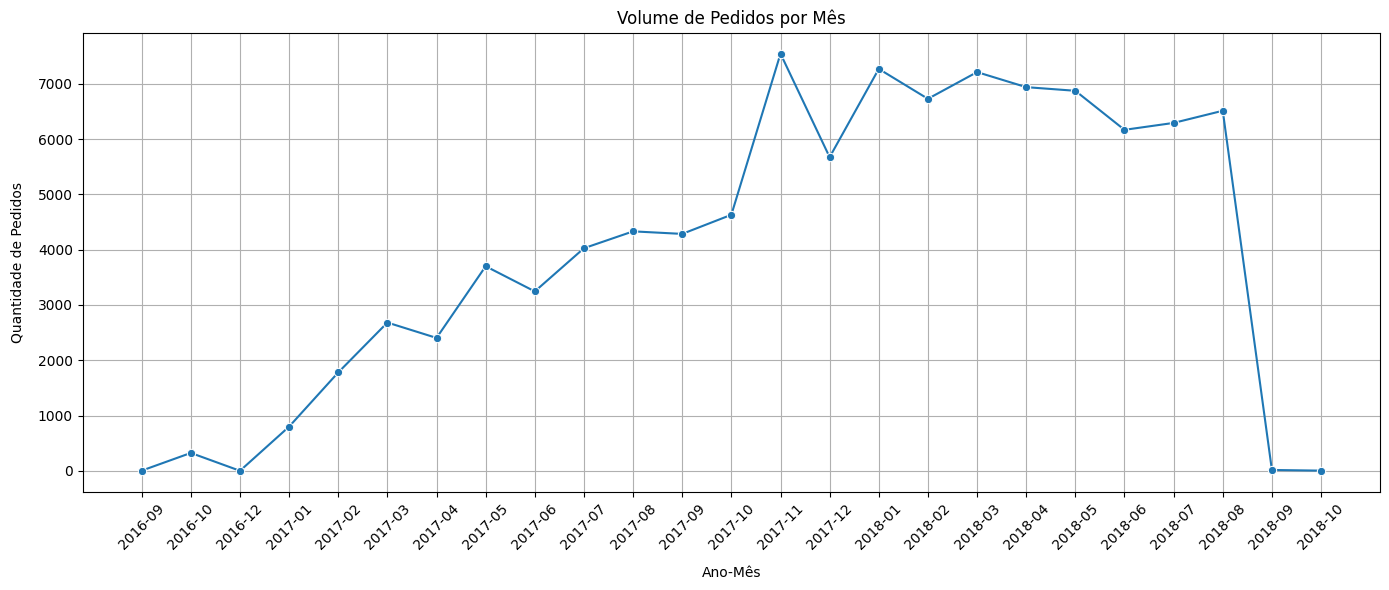

In [22]:
# convertendo coluna de data para o formato datetime
pedidos['order_purchase_timestamp'] = pd.to_datetime(pedidos['order_purchase_timestamp'])

# adiciona a coluna de ano e mês
pedidos['ano_mes'] = pedidos['order_purchase_timestamp'].dt.to_period('M')

# realiza a contagem de pedidos por mês
número_pedidos = pedidos.groupby('ano_mes')['order_id'].count().reset_index()
número_pedidos['ano_mes'] = número_pedidos['ano_mes'].astype(str)

# exibir o grafico
plt.figure(figsize=(14,6))
sns.lineplot(data=número_pedidos, x='ano_mes', y='order_id', marker='o')
plt.title('Volume de Pedidos por Mês')
plt.xlabel('Ano-Mês',labelpad=10)
plt.ylabel('Quantidade de Pedidos',labelpad=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

#### b) Qual a distribuição do tempo de entrega dos pedidos?
A maioria das entregas ocorre rapidamente, entre 5 e 15 dias, com pico em torno de 8 dias, mas há alguns casos com entregas muito mais longas.

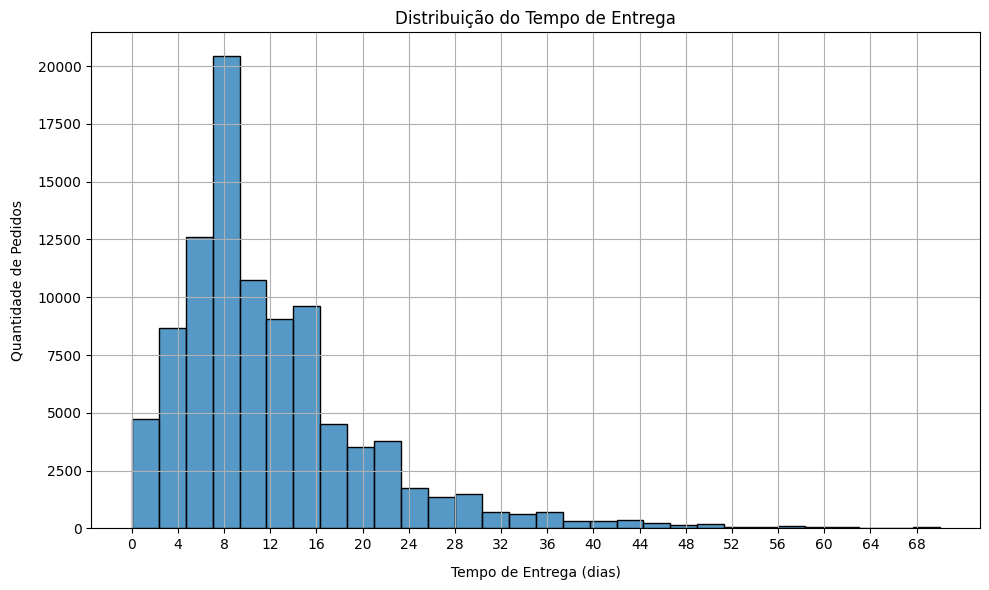

In [23]:
# convertendo coluna de data para o formato datetime
pedidos['order_purchase_timestamp'] = pd.to_datetime(pedidos['order_purchase_timestamp'])
pedidos['order_delivered_customer_date'] = pd.to_datetime(pedidos['order_delivered_customer_date'])

# subtrai a data da entrega pela data data da compra e calcula tempo de entrega em dias
pedidos['tempo_entrega'] = (pedidos['order_delivered_customer_date'] - pedidos['order_purchase_timestamp']).dt.days

# filtra os valores que não são nulos
entrega_valida = pedidos[pedidos['tempo_entrega'].notnull()]

# defini um tempo de entrega máximo de 70 dias para melhor visualização
tempo_entrega = entrega_valida[entrega_valida['tempo_entrega'] <= 70]

# exibir o histograma
plt.figure(figsize=(10,6))
sns.histplot(tempo_entrega['tempo_entrega'], bins=30)
plt.title('Distribuição do Tempo de Entrega')
plt.xlabel('Tempo de Entrega (dias)', labelpad=10)
plt.ylabel('Quantidade de Pedidos',labelpad=10)
plt.xticks(ticks=range(0, 72, 4))
plt.grid(True)
plt.tight_layout()
plt.show()


#### c) Qual a relação entre o valor do frete e a distância de entrega?

O gráfico abaixo mostra que os maiores valores médios de frete ocorrem entre estados geograficamente distantes ou de difícil acesso logístico, ou seja,  Isso indica que quanto maior a distância ou mais remota a região, maior tende a ser o custo do frete.

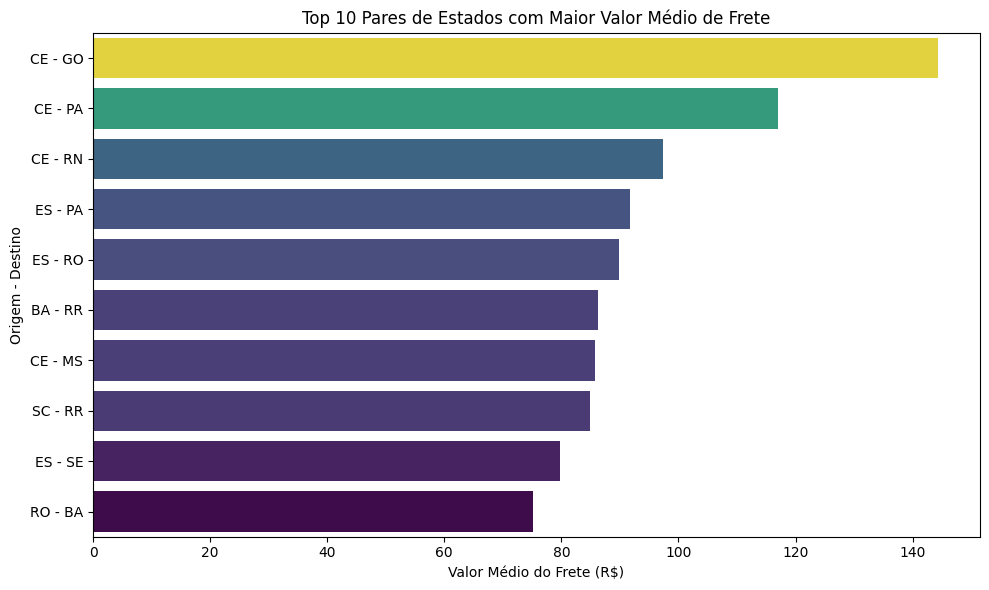

In [24]:
# merge pedidos com clientes e vendedores
dados_estados = pedidos_items.merge(pedidos, on='order_id') \
                             .merge(clientes[['customer_id', 'customer_state']], on='customer_id') \
                             .merge(vendedores[['seller_id', 'seller_state']], on='seller_id')

# calcula o valor médio do frete por par de estado
frete_estado = dados_estados.groupby(['customer_state', 'seller_state'])['freight_value'].mean().reset_index()

# pega os top 10 pares com maior valor médio de frete
frete = frete_estado.sort_values('freight_value', ascending=False).head(10)

# cria coluna com os pares de estados
frete['par_estados'] = frete['seller_state'] + ' - ' + frete['customer_state']

# exibi gráfico
plt.figure(figsize=(10,6))
sns.barplot(data=frete, x='freight_value', y='par_estados', hue='freight_value', palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Pares de Estados com Maior Valor Médio de Frete')
plt.xlabel('Valor Médio do Frete (R$)')
plt.ylabel('Origem - Destino')
plt.tight_layout()
plt.show()


#### d) Quais são as categorias de produtos mais vendidas em termos de faturamento?
As categorias com maior faturamento são beleza_saude, relogios_presentes e cama_mesa_banho.

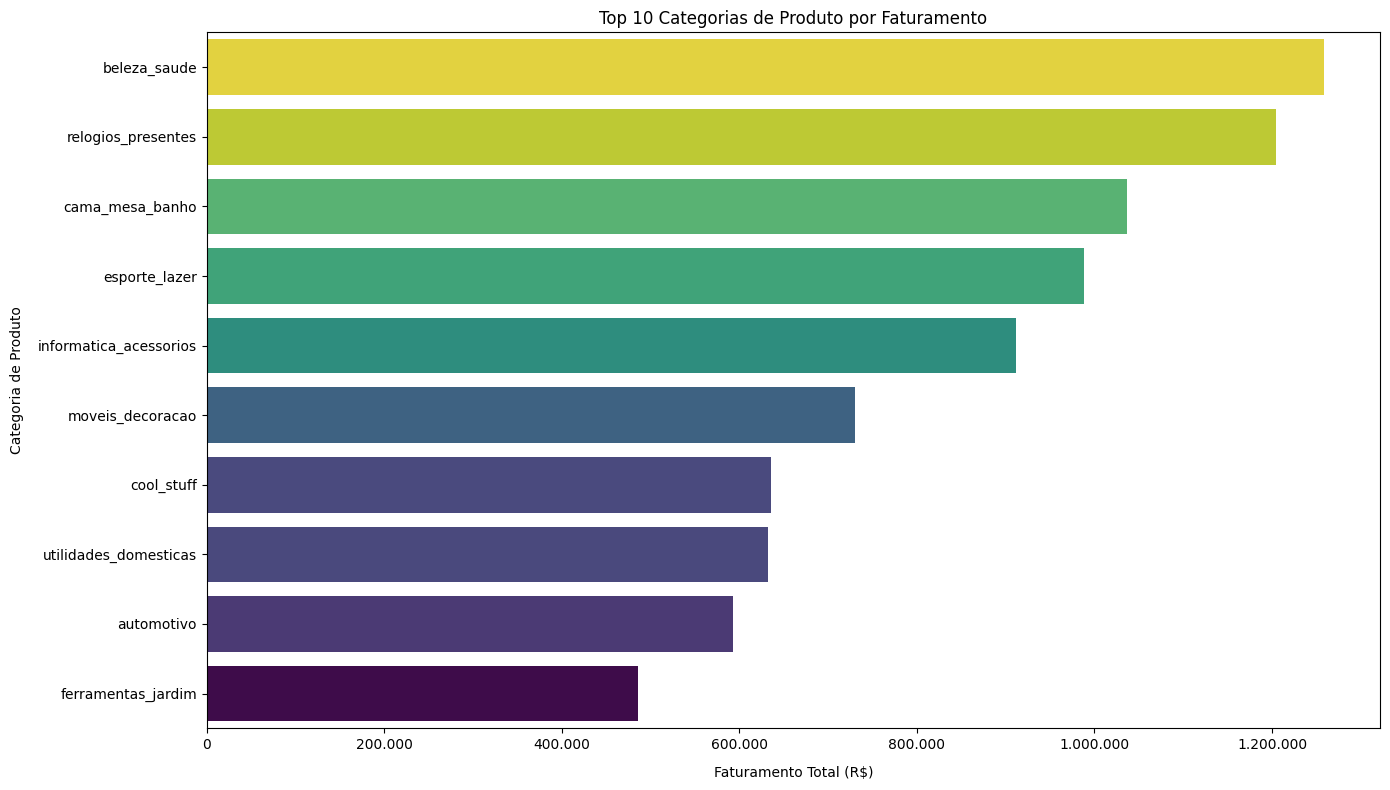

In [25]:
# merge itens de pedido com produtos
itens_categoria = pedidos_items.merge(produtos, on='product_id', how='inner')

# merge com a tradução das categorias
itens_categoria = itens_categoria.merge(categorias, on='product_category_name', how='left')

# agrupando por nome traduzido da categoria e somando os preços
faturamento_categoria = itens_categoria.groupby('product_category_name')['price'].sum().sort_values(ascending=False).reset_index()

# exibir o grafico
plt.figure(figsize=(14,8))
sns.barplot(data=faturamento_categoria.head(10), x='price', y='product_category_name', hue='price', palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Categorias de Produto por Faturamento')
plt.xlabel('Faturamento Total (R$)', labelpad=10)
plt.ylabel('Categoria de Produto', labelpad=10)

# exibir apenas números inteiros no eixo X
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

plt.tight_layout()
plt.show()


#### e) Quais estados brasileiros possuem o maior valor médio de pedido?
Os estados com o maior valor médio de pedido são Paraíba, Acre e Rondônia, nesses estados os compradores tendem a realizar pedidos de maior valor.

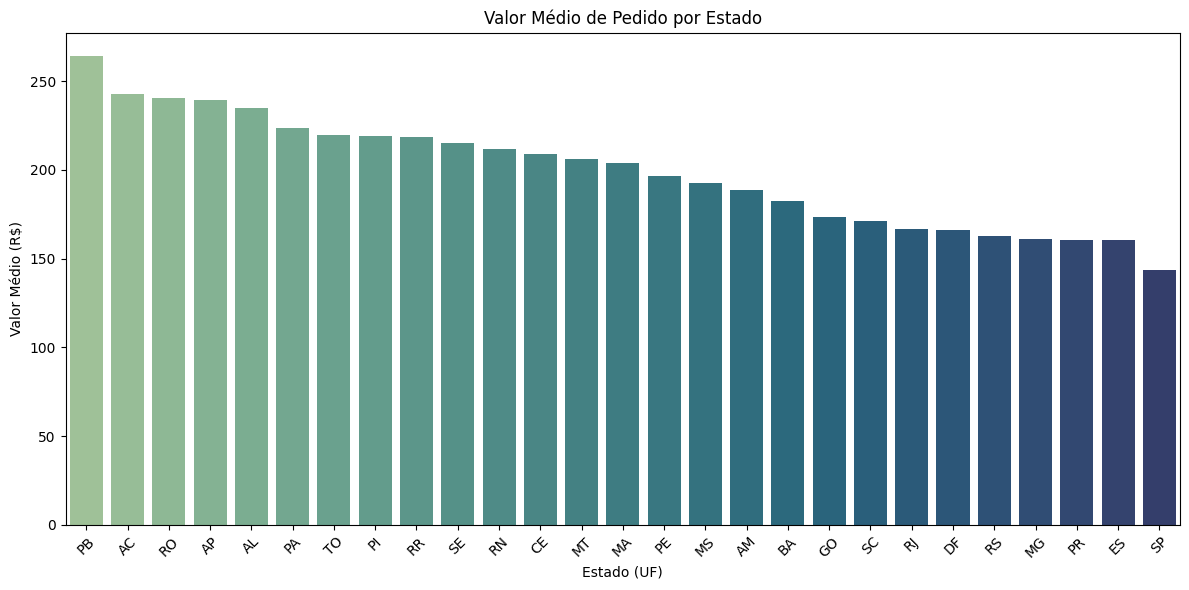

In [26]:
# realiza a soma dos valores de pagamento por pedido
pagamento_total = pedidos_pagamento.groupby("order_id")["payment_value"].sum().reset_index()

# merde dos pedidos com os valores pagos
pedidos_pagamento = pedidos.merge(pagamento_total, on="order_id", how="inner")

# merge dos dados dos clientes
pedidos_estado = pedidos_pagamento.merge(clientes[["customer_id", "customer_state"]], on="customer_id", how="left")

# agrupa por estado e calcula a média
media_estado = (
    pedidos_estado.groupby("customer_state")["payment_value"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# exibir o gráfico
plt.figure(figsize=(12,6))
sns.barplot(data=media_estado, x="customer_state", y="payment_value", palette="crest", hue='customer_state',legend=False )
plt.title("Valor Médio de Pedido por Estado")
plt.xlabel("Estado (UF)")
plt.ylabel("Valor Médio (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. Solução de Problemas de Negócio

### Análise de Retenção

Não é possível fazer essa análise, pois cada cliente fez somente um pedido. Portanto não é viável calcular a retenção dos clientes. o código abaixo explica isso.

In [27]:
# verifica quantos clientes no total existem
total_clientes = clientes['customer_id'].nunique()

# verifica quantos clientes fizeram pedidos
clientes_pedidos = pedidos['customer_id'].nunique()

# Clientes que não fizeram pedidos
clientes_sem_pedido = total_clientes - clientes_pedidos

print(f"total de clientes: {total_clientes}")
print(f"clientes com pelo menos 1 pedido: {clientes_pedidos}")
print(f"clientes sem nenhum pedido: {clientes_sem_pedido}\n")

# calcula o número de clientes com pedidos
pedidos_cliente = pedidos.groupby("customer_id")["order_id"].nunique()

# clientes recorrentes,com mais de 1 pedido
clientes_recorrentes = pedidos_cliente[pedidos_cliente > 1].count()

# total de clientes com pelo menos 1 pedido
clientes_ativos = pedidos_cliente.count()

# Taxa de recorrência (%)
recorrencia = (clientes_recorrentes / clientes_ativos) * 100

print(f"Total de clientes com pedidos: {clientes_ativos}")
print(f"Clientes recorrentes (mais de 1 pedido): {clientes_recorrentes}")
print(f"Taxa de clientes recorrentes: {recorrencia:.2f}%")

total de clientes: 99441
clientes com pelo menos 1 pedido: 99441
clientes sem nenhum pedido: 0

Total de clientes com pedidos: 99441
Clientes recorrentes (mais de 1 pedido): 0
Taxa de clientes recorrentes: 0.00%


### Predição de Atraso

1.Defina o que seria um pedido atrasado (baseado nas colunas disponíveis), o código abaixo calcula o que seria um pedido atrasado.
```python
pedidos['atraso'] = (pedidos['order_delivered_customer_date'] > pedidos['order_estimated_delivery_date']).astype(int)
```
2.Use os campos relevantes para criar features para seu modelo.
Eu utilizei as colunas dias_prometidos, dias_entrega_real, quantidade_itens, preco_total, frete_total, payment_value.

3.Divida o dataset em treino e teste, utilizei o codigo abaixo para essa tarefa.
```python 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
```

4.Implemente um modelo de classificação simples (pode usar Regressão Logística, Random Forest ou outro de sua escolha), utilizei o Random Forest para criar o modelo.
```python
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)
```

5.Avalie a performance do modelo e explique os resultados.

O treinamento do modelo de classificação foi feito utilizando o algoritmo Random Forest. Primeiramente, foi calculada a acurácia do modelo, que medi a proporção de previsões corretas. Logo depois foi feito o relatório de classificação que nos deu uma visão sobre precisão, revocação e F1-score para cada classe, isso permitiu avaliar os falsos positivos e falsos negativos.

Depois foi gerada uma matriz de confusão para visualizar quantos pedidos foram corretamente ou incorretamente classificados como atrasados.
Também foi utilizada a métrica ROC-AUC, para medir o desempenho do modelo considerando diferentes limiares de decisão.

No final foi gerado um gráfico com a importância relativa das variáveis no modelo Random Forest, tal visualização ajuda a entender quais atributos mais influenciam a predição de atraso.

Acurácia: 0.99 


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17730
           1       0.97      0.94      0.96      1565

    accuracy                           0.99     19295
   macro avg       0.98      0.97      0.98     19295
weighted avg       0.99      0.99      0.99     19295




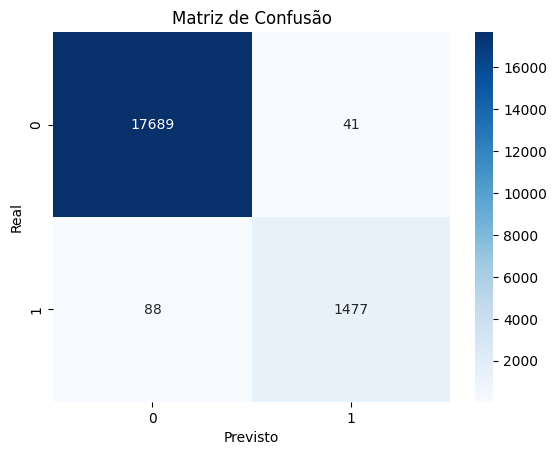

ROC-AUC: 1.00



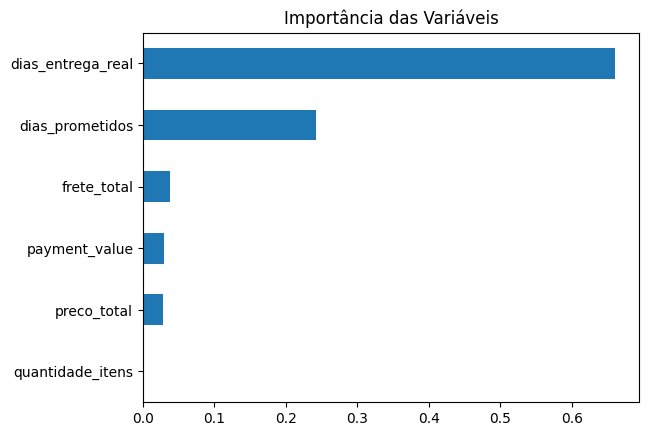

In [28]:
# conversão de colunas de data para o formato datetime
pedidos['order_delivered_customer_date'] = pd.to_datetime(pedidos['order_delivered_customer_date'])
pedidos['order_estimated_delivery_date'] = pd.to_datetime(pedidos['order_estimated_delivery_date'])
pedidos['order_purchase_timestamp'] = pd.to_datetime(pedidos['order_purchase_timestamp'])

# criando a variável alvo: 1 = atrasado, 0 = no prazo
pedidos['atraso'] = (pedidos['order_delivered_customer_date'] > pedidos['order_estimated_delivery_date']).astype(int)

# remove linhas com datas que não existam
pedidos = pedidos.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date', 'order_purchase_timestamp'])

# calcula o tempo prometido para entrega  e converte em dias
pedidos['dias_prometidos'] = (pedidos['order_estimated_delivery_date'] - pedidos['order_purchase_timestamp']).dt.days

# calcula o tempo real de entrega e converte em dias
pedidos['dias_entrega_real'] = (pedidos['order_delivered_customer_date'] - pedidos['order_purchase_timestamp']).dt.days

# faz o merge dos itens para contar número de produtos por pedido
itens_pedido = pedidos_items.groupby('order_id').agg({
    'order_item_id': 'count',
    'price': 'sum',
    'freight_value': 'sum'
}).rename(columns={
    'order_item_id': 'quantidade_itens',
    'price': 'preco_total',
    'freight_value': 'frete_total'
})

# faz o merge com pagamentos para somar valor total pago
pagamento_pedido = pedidos_pagamento.groupby('order_id').agg({'payment_value': 'sum'})

# faz a união de todas as features com o dataframe de pedidos
df = pedidos.merge(itens_pedido, on='order_id', how='left').merge(pagamento_pedido, on='order_id', how='left')

# seleciona as colunas para o modelo
features = ['dias_prometidos', 'dias_entrega_real', 'quantidade_itens', 'preco_total', 'frete_total', 'payment_value']
target = 'atraso'

# criando o dataframe com apenas as features e a variável alvo
df_modelo = df[features + [target]].dropna()

# separando os dados em variáveis explicativas e variável alvo
X = df_modelo[features]
y = df_modelo[target]


# dividi o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# cria e treina o modelo de classificação random forest
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# realiza previsões com o conjunto de teste
y_pred = modelo.predict(X_test)

# obtém as probabilidades preditas
y_proba = modelo.predict_proba(X_test)[:, 1]

# realiza a medição da acurácia do modelo
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f} \n")

# printa as métricas detalhadas
print("\nRelatório de Classificação:")
print(f"{classification_report(y_test, y_pred)}\n")

# gerando matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# avalia a performance geral do modelo
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.2f}\n")

# exibi importância relativa de cada feature
importances = pd.Series(modelo.feature_importances_, index=features)
importances.sort_values().plot(kind='barh')
plt.title("Importância das Variáveis")
plt.show()



### Segmentação de Clientes



Nesse desafio utilizei técnicas de clustering para segmentar os clientes em grupos, Analisei o comportamento de cada grupo e sugeri algumas  estratégias de marketing específicas para cada um. abaixo está os 4 perfis que analisei e suas respectivas e estratégias de marketing.

1.Clientes Novos ou Ocasionalmente Insatisfeitos.

Implementar campanhas de reengajamento. Realizar pesquisas de satisfação, como o envio de emails após realizar uma compra para pode ajudar a fortalecer o relacionamento com o cliente e identificar pontos de melhoria. Investir na redução do tempo de entrega e na melhoria da qualidade do serviço para pode aumentar a satisfação dos clientes.

2.Clientes Premium

A criação de um programa VIP. Uso de ofertas personalizadas com base no histórico de compras. Agradecimentos personalizados, como cupons de aniversário ou pequenos presentes surpresa. Esse tipo de estratégias de marketing é muito utilizado em programas sócio torcedor realizados por times de futebol e também plataformas de e-commerce.

3.Clientes Frequentes e Leais.

implementação de um programa de fidelidade por pontos. Aplicar estratégias como combos e ofertas personalizadas com base no comportamento de compra anterior. Convidar clientes a indicarem amigos oferecendo recompensas pela indicação o que pode ampliar a base de consumidores.

4.Clientes Econômicos

Realizar promoções com foco em preço, como oferecer frete grátis para compras acima de um determinado valor. Agrupar produtos em combos econômicos aumentando o ticket médio de forma atrativa. Incentivar os clientes a experimentarem novas categorias por meio de descontos direcionados para diversificar o consumo.

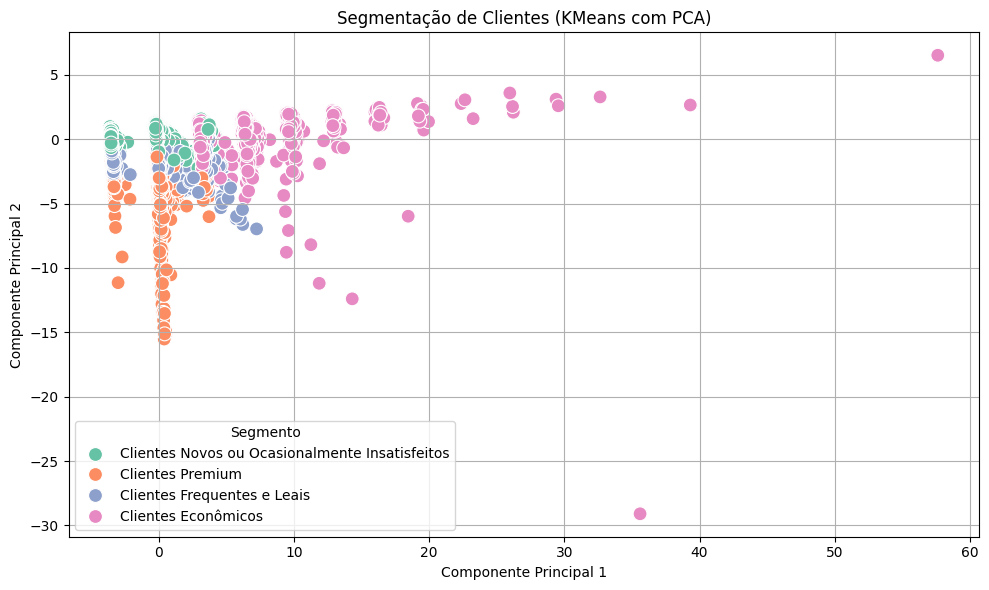

In [29]:
# defini os dataframes utilizados
clientes = pd.read_csv(path + 'olist_customers_dataset.csv')
pedidos_items = pd.read_csv(path + 'olist_order_items_dataset.csv')
pedidos_pagamento = pd.read_csv(path + 'olist_order_payments_dataset.csv')
pedidos_avaliacao = pd.read_csv(path + 'olist_order_reviews_dataset.csv')
pedidos = pd.read_csv(path + 'olist_orders_dataset.csv')
produtos = pd.read_csv(path + 'olist_products_dataset.csv')

# unifica o dataframe 
df_clientes = clientes.merge(pedidos, on='customer_id', how='inner')
df_clientes = df_clientes.merge(pedidos_pagamento, on='order_id', how='left')
df_clientes = df_clientes.merge(pedidos_avaliacao, on='order_id', how='left')
df_clientes = df_clientes.merge(pedidos_items, on='order_id', how='left')
df_clientes = df_clientes.merge(produtos[['product_id', 'product_category_name']], on='product_id', how='left')

# Converte as datas para o formato datetime
df_clientes['order_purchase_timestamp'] = pd.to_datetime(df_clientes['order_purchase_timestamp'])
df_clientes['order_delivered_customer_date'] = pd.to_datetime(df_clientes['order_delivered_customer_date'])

# calcula o tempo de entrega
df_clientes['delivery_time'] = (df_clientes['order_delivered_customer_date'] - df_clientes['order_purchase_timestamp']).dt.days

# crio métricas por cliente e depois aplico diferentes agregações para gerar um perfil de comportamento por cliente
clientes_grupos = df_clientes.groupby('customer_unique_id').agg({
    'order_id': pd.Series.nunique,
    'payment_value': 'sum',
    'delivery_time': 'mean',
    'review_score': 'mean',
    'product_category_name': pd.Series.nunique
}).reset_index()

# renomeando colunas
clientes_grupos.columns = ['customer_id', 'total_pedidos', 'valor_total', 'media_entrega', 'media_avaliacao', 'diversidade_categorias']

# Removendo valores que não existem
clientes_grupos = clientes_grupos.dropna()

# realizo a padronização de todas as variáveis com média 0 e desvio padrão 1 usando StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(clientes_grupos.drop('customer_id', axis=1))

# aplico o kmeans para agrupar os clientes pelo comportamento, resultando em 4 clusters.
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
clientes_grupos['cluster'] = kmeans.fit_predict(X_scaled)

# usa o PCA para reduzir os dados para 2 dimensões, isso ajuda na hora da visualização dos clusters no gráfico.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
clientes_grupos['PCA1'] = X_pca[:, 0]
clientes_grupos['PCA2'] = X_pca[:, 1]

# o trecho codigo abaixo me ajudou a definir  os nomes para cada cluster
#cluster_estatistica = clientes_grupos.groupby('cluster').mean(numeric_only=True)
#print(cluster_estatistica)

# nomea os clusters com base no comportamento dos clientes de cada cluster
cluster_nomes = {
    0: 'Clientes Econômicos',
    1: 'Clientes Frequentes e Leais',
    2: 'Clientes Novos ou Ocasionalmente Insatisfeitos',
    3: 'Clientes Premium'
}
clientes_grupos['segmento'] = clientes_grupos['cluster'].map(cluster_nomes)

# exibi os clusters em um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clientes_grupos, x='PCA1', y='PCA2', hue='segmento', palette='Set2', s=100)
plt.title('Segmentação de Clientes (KMeans com PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Segmento')
plt.grid(True)
plt.tight_layout()
plt.show()

### Análise de Satisfação

Os fatores que mais impactam a satisfação do cliente são:

- Preço do produto e valor do frete.

- Tempo de entrega.

- Categoria do produto.

#### Preparação dos dados

In [30]:
# uni pedidos com avaliações
df = pedidos.merge(pedidos_avaliacao, on='order_id', how='inner')

# uni com os dados de pagamento
df = df.merge(pedidos_pagamento, on='order_id', how='left')

# uni com os itens do pedido
df = df.merge(pedidos_items, on='order_id', how='left')

# uni com os produtos
df = df.merge(produtos[['product_id', 'product_category_name']], on='product_id', how='left')

# uni com as categorias
df = df.merge(categorias, on='product_category_name', how='left')

# converter colunas de data para datetime
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# faz o calculo do tempo de entrega em dias
df['tempo_entrega'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# pega as top categorias de produto
top_categorias = df['product_category_name'].value_counts().head(10).index

# filtra o dataframe para pegar somente os registros das 10 categorias mais populares
df_top = df[df['product_category_name'].isin(top_categorias)]

# seleciona as variáveis numéricas para análise
variaveis_numericas = df[['review_score', 'price', 'freight_value', 'tempo_entrega']]


#### Boxplot: Tempo de entrega por nota e Preço por nota

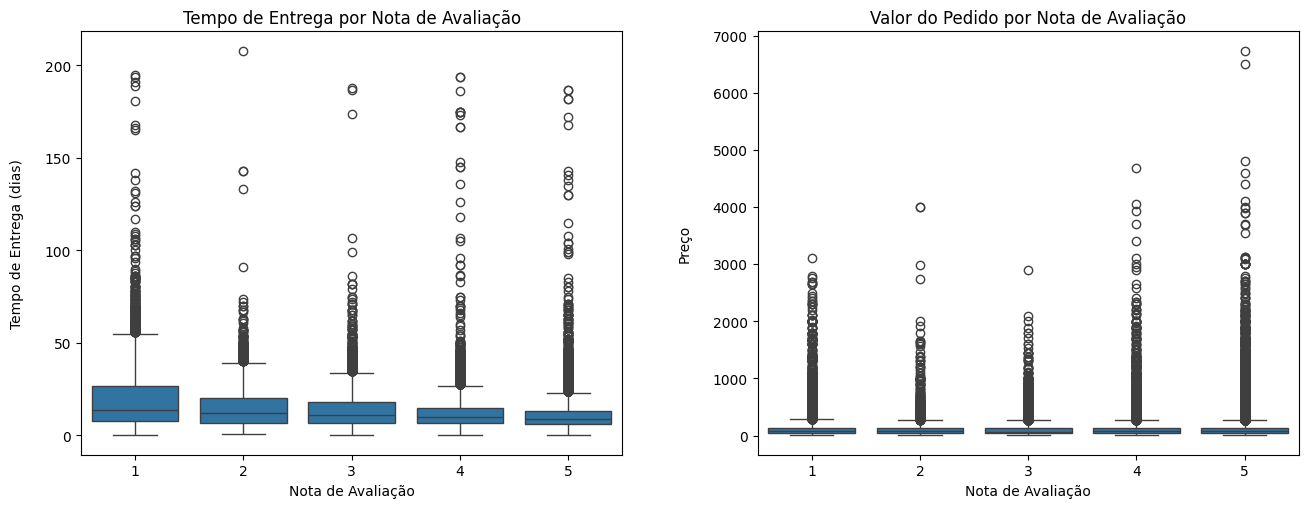

In [31]:
# cria uma figura com subgráficos
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))

# Boxplot de tempo de entrega por nota
sns.boxplot(x='review_score', y='tempo_entrega', data=df, ax=axes[0])
axes[0].set_title('Tempo de Entrega por Nota de Avaliação')
axes[0].set_xlabel('Nota de Avaliação')
axes[0].set_ylabel('Tempo de Entrega (dias)', labelpad=15)

# Boxplot de preço por nota
sns.boxplot(x='review_score', y='price', data=df, ax=axes[1])
axes[1].set_title('Valor do Pedido por Nota de Avaliação')
axes[1].set_xlabel('Nota de Avaliação')
axes[1].set_ylabel('Preço',labelpad=15)

#exibi o gráfico
plt.tight_layout(pad=4)
plt.show()

#### Boxplot: Nota de Avaliação por Categoria de Produto

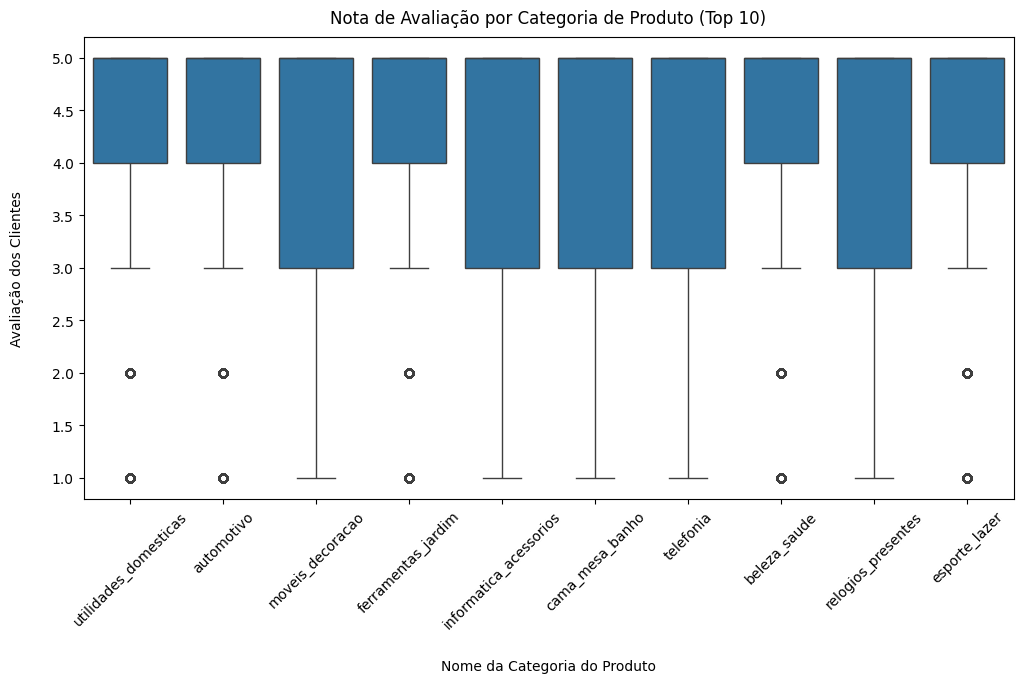

In [32]:
#exibi o gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='product_category_name', y='review_score')
plt.xticks(rotation=45)
plt.xlabel(xlabel='Nome da Categoria do Produto', labelpad=20)
plt.ylabel(ylabel='Avaliação dos Clientes', labelpad=20)
plt.title('Nota de Avaliação por Categoria de Produto (Top 10)',pad=10)
plt.show()

#### Matriz de correlação entre as variáveis representada por um mapa de calor

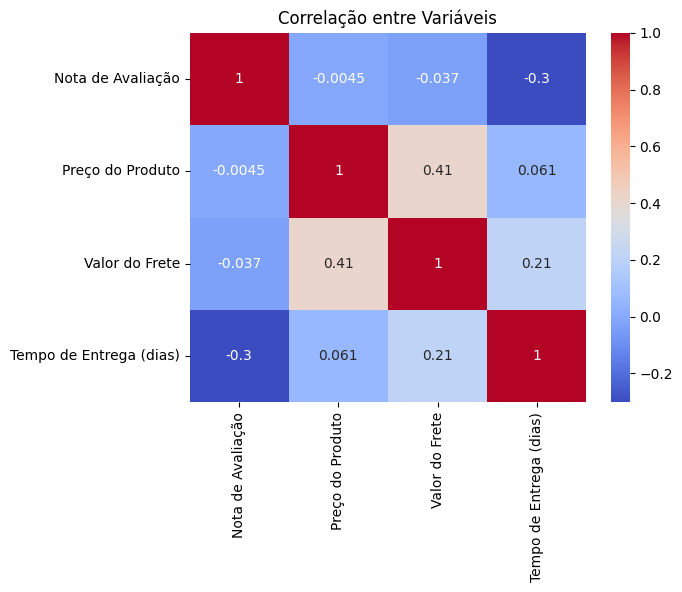

In [33]:
# renomeia as colunas para português
variaveis_numericas = variaveis_numericas.rename(columns={
    'review_score': 'Nota de Avaliação',
    'price': 'Preço do Produto',
    'freight_value': 'Valor do Frete',
    'tempo_entrega': 'Tempo de Entrega (dias)'
})

# calcula a correlação
correlacoes = variaveis_numericas.corr()

# Cria o mapa de calor
sns.heatmap(correlacoes, annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()

#### Fatores que mais impactam na satisfação do cliente.

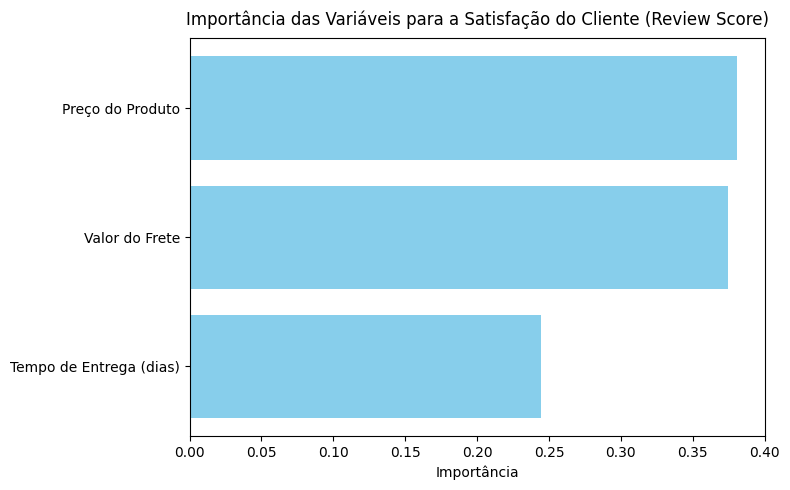

In [34]:
# seleciona as colunas e remove linhas com valores ausentes.
df_modelo = df[['review_score', 'price', 'freight_value', 'tempo_entrega']].dropna()

# define as variáveis x e y
X = df_modelo.drop('review_score', axis=1)
y = df_modelo['review_score']

# divide os dados para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# instancia o moddelo Random Forest
modelo = RandomForestRegressor()

# treina o modelo
modelo.fit(X_train, y_train)

# pega a importância de cada variável no modelo
importances = modelo.feature_importances_

# cria uma variável para renomear os eixos y no gráfico com nomes em português
nomes_eixo_y = {
    'price': 'Preço do Produto',
    'freight_value': 'Valor do Frete',
    'tempo_entrega': 'Tempo de Entrega (dias)'
}

# configura e exibi o gráfico
plt.figure(figsize=(8, 5))
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel('Importância')
plt.title('Importância das Variáveis para a Satisfação do Cliente (Review Score)', pad=10)

plt.yticks(ticks=range(len(X.columns)), labels=[nomes_eixo_y[col] for col in X.columns])

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 4. Visualização e Dashboards

### Um dashboard geral que mostre a evolução das vendas ao longo do tempo, com filtros por estado e categoria de produto.

In [35]:
# faz um merge dos dataframes em um único que será utilizado nesse gráfico.
df_estado_categoria = pedidos.merge(clientes, on="customer_id") \
           .merge(pedidos_items[["order_id", "product_id", "price"]], on="order_id") \
           .merge(produtos[["product_id", "product_category_name"]], on="product_id") \
           .merge(categorias, on="product_category_name", how="left")

# converte a coluna order_purchase_timestamp para o formato datetime.
df_estado_categoria["order_purchase_timestamp"] = pd.to_datetime(df_estado_categoria["order_purchase_timestamp"], errors='coerce')

# crie uma nova coluna order_month com ano-mês para fazer o agrupamento por ano-mês.
df_estado_categoria["order_month"] = df_estado_categoria["order_purchase_timestamp"].dt.to_period("M").astype(str)

# renomeia colunas para category e state.
df_estado_categoria.rename(columns={"product_category_name": "category", "customer_state": "state"}, inplace=True)

# cria os filtros para selecionar o estado e a categoria.
estados_filtro = sorted(df_estado_categoria["state"].dropna().unique())
categorias_filtro = sorted(df_estado_categoria["category"].dropna().unique())

dropdown_estado = widgets.Dropdown(options=estados_filtro, description='Estado:', value='SP')
dropdown_categoria = widgets.Dropdown(options=categorias_filtro, description='Categoria:', value='agro_industria_e_comercio')

# função que atualiza o grafico a cada input de categoria ou estado
def atualizar_dashboard(estado, categoria):
    
    # limpa a saída anterior do gráfico
    clear_output(wait=True)

    # filtra o DataFrame pelo estado e categoria
    filtro = df_estado_categoria[(df_estado_categoria["state"] == estado) & (df_estado_categoria["category"] == categoria)]
    
    if filtro.empty:
        print("sem dados")
        return

    # agrupa pelo mês e faz a soma dos preços
    vendas = filtro.groupby("order_month")["price"].sum().reset_index()

    # converte os dados da coluna order_month para datetime
    vendas["order_month"] = pd.to_datetime(vendas["order_month"])

    # exibi o gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(vendas["order_month"], vendas["price"], marker='o')
    plt.title(f"Vendas Mensais: {categoria} - {estado}")
    plt.xlabel("Mês", labelpad=10)
    plt.ylabel("Vendas (R$)", labelpad=10)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# cria um dashboard que ao mudar o valor dos filtros o gráfico é atualizado.
widgets.interact(atualizar_dashboard, estado=dropdown_estado, categoria=dropdown_categoria);

interactive(children=(Dropdown(description='Estado:', index=25, options=('AC', 'AL', 'AM', 'AP', 'BA', 'CE', '…

### Um mapa de calor mostrando a concentração de vendas por região/estado do Brasil.

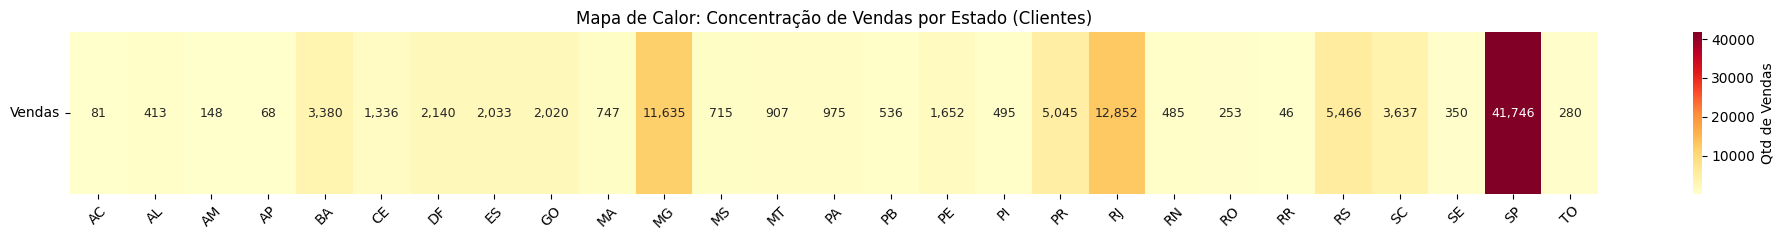

In [36]:
# unifica os dataframes de clientes e pedidos
pedidos_clientes = pd.merge(pedidos, clientes, on='customer_id')

# conta o número de vendas por estado
vendas_estado = pedidos_clientes['customer_state'].value_counts().sort_index()

# prepara os dados para o mapa de calor
data = vendas_estado.values.reshape(1, -1)
labels = vendas_estado.index.tolist()
valores_formatados = np.array([f'{v:,.0f}' for v in vendas_estado.values]).reshape(1, -1)

# cria e configura o mapa de calor a ser exibido
plt.figure(figsize=(20, 2.5))
sns.heatmap(
    data,
    cmap='YlOrRd',
    annot=valores_formatados,
    fmt='',
    xticklabels=labels,
    yticklabels=['Vendas'],
    cbar_kws={'label': 'Qtd de Vendas'},
    annot_kws={"size": 9, "va": "center", "ha": "center"}
)
plt.title('Mapa de Calor: Concentração de Vendas por Estado (Clientes)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Um conjunto de gráficos que apresente a relação entre avaliação do cliente e tempo de entrega.

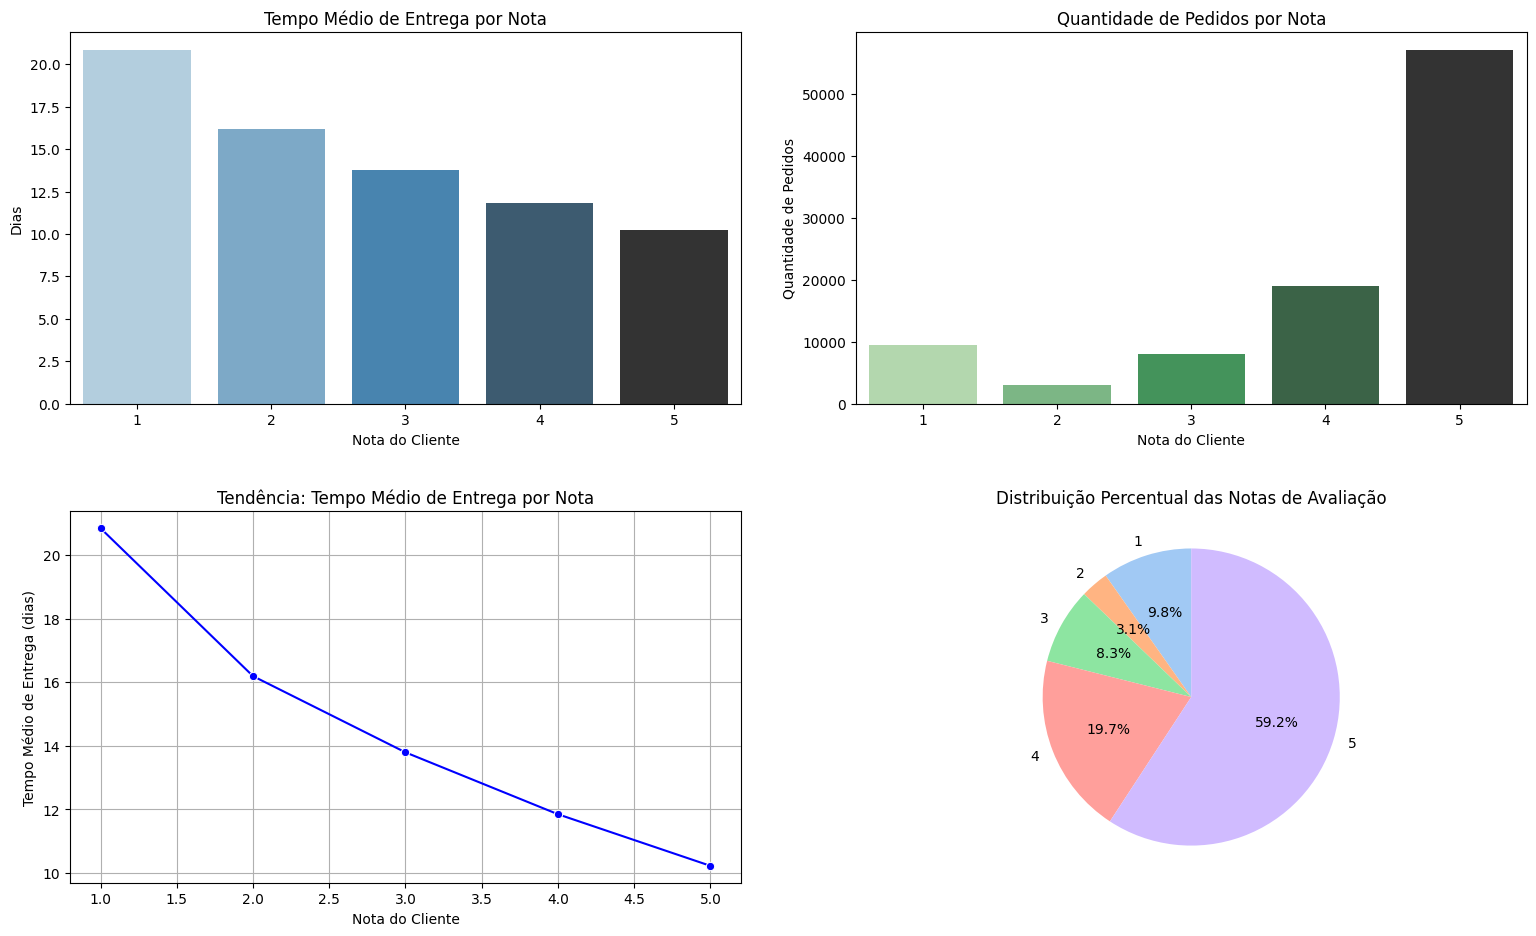

In [37]:
# unifica os dataframes pedidos e pedidos_avaliacao
df_pedidos_avaliação = pedidos.merge(pedidos_avaliacao, on="order_id")

# converte as datas para o formato datetime
df_pedidos_avaliação["order_purchase_timestamp"] = pd.to_datetime(df_pedidos_avaliação["order_purchase_timestamp"], errors='coerce')
df_pedidos_avaliação["order_delivered_customer_date"] = pd.to_datetime(df_pedidos_avaliação["order_delivered_customer_date"], errors='coerce')

# calcula o tempo de entrega
df_pedidos_avaliação["delivery_time"] = (df_pedidos_avaliação["order_delivered_customer_date"] - df_pedidos_avaliação["order_purchase_timestamp"]).dt.days

# remove valores nulos( caso exista ) e negativos
df_pedidos_avaliação = df_pedidos_avaliação.dropna(subset=["delivery_time", "review_score"])
df_pedidos_avaliação = df_pedidos_avaliação[df_pedidos_avaliação["delivery_time"] >= 0]

# faz o agrupamento e calcula a media do tempo de entrega
media_tempo = df_pedidos_avaliação.groupby("review_score")["delivery_time"].mean().reset_index()

# realiza a contagem dos pedidos
quantidade_pedidos = df_pedidos_avaliação["review_score"].value_counts().sort_index().reset_index()

# renomeia as colunas
quantidade_pedidos.columns = ["review_score", "quantidade"]

# cria uma figura com 4 gráficos
plt.figure(figsize=(16, 10))

# gráfico de barra: tempo médio de entrega por nota
plt.subplot(2, 2, 1)
sns.barplot(x="review_score", y="delivery_time", data=media_tempo, palette="Blues_d", hue='review_score', legend=False)
plt.title("Tempo Médio de Entrega por Nota")
plt.xlabel("Nota do Cliente")
plt.ylabel("Dias")

# gráfico de barra: quantidade de pedidos por nota
plt.subplot(2, 2, 2)
sns.barplot(x="review_score", y="quantidade", data=quantidade_pedidos, palette="Greens_d", hue='review_score', legend=False)
plt.title("Quantidade de Pedidos por Nota")
plt.xlabel("Nota do Cliente")
plt.ylabel("Quantidade de Pedidos")

# gráfico de linha: Tendência do tempo médio por nota
plt.subplot(2, 2, 3)
sns.lineplot(data=media_tempo, x="review_score", y="delivery_time", marker="o", color="blue")
plt.title("Tendência: Tempo Médio de Entrega por Nota")
plt.xlabel("Nota do Cliente")
plt.ylabel("Tempo Médio de Entrega (dias)")
plt.grid(True)

# gráfico de pizza: Distribuição percentual das notas
plt.subplot(2, 2, 4)
cores = sns.color_palette("pastel")
plt.pie(
    quantidade_pedidos["quantidade"],
    labels=quantidade_pedidos["review_score"],
    autopct='%1.1f%%',
    startangle=90,
    colors=cores,
)
plt.title("Distribuição Percentual das Notas de Avaliação")

# exibi o layout final
plt.tight_layout(pad=3)
plt.show()

### Um dashboard de análise dos vendedores, mostrando quais têm melhor desempenho em termos de volume de vendas, satisfação do cliente e tempo de entrega.

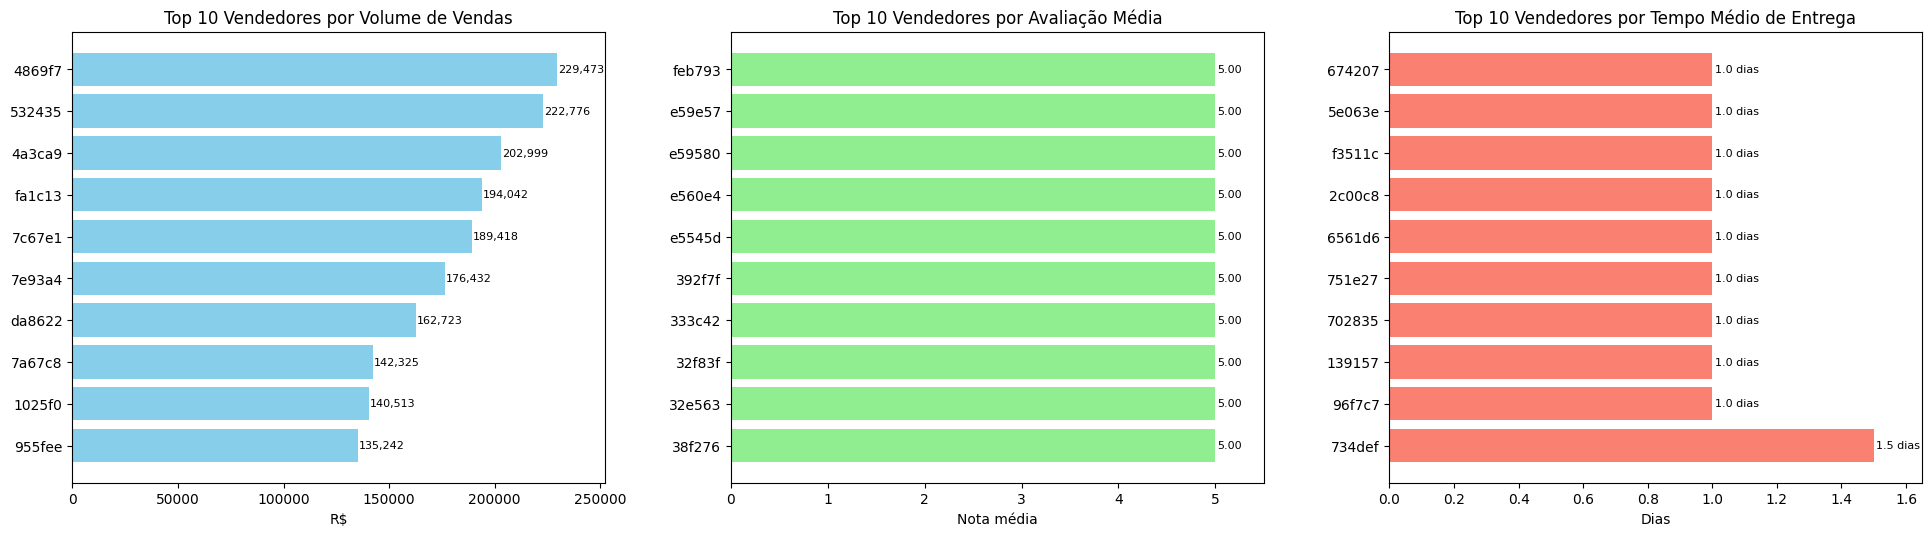

In [38]:
# unifica as tabelas pedidos_items, pedidos e pedidos_avaliacao em um único dataframe
df_vendedores = pedidos_items.merge(pedidos, on="order_id", how="left") \
                             .merge(pedidos_avaliacao[["order_id", "review_score"]], on="order_id", how="left")

# converte datas para datatime
df_vendedores["order_purchase_timestamp"] = pd.to_datetime(df_vendedores["order_purchase_timestamp"], errors='coerce')
df_vendedores["order_delivered_customer_date"] = pd.to_datetime(df_vendedores["order_delivered_customer_date"], errors='coerce')

# cálcula do tempo de entrega e converte o resultado em em dias
df_vendedores["delivery_time"] = (df_vendedores["order_delivered_customer_date"] - df_vendedores["order_purchase_timestamp"]).dt.days

# agrupa por vendedor
vendedores = df_vendedores.groupby("seller_id").agg({
    "price": "sum",
    "review_score": "mean",
    "delivery_time": "mean"
}).reset_index()

# renomea as colunas para melhor visualização
vendedores.rename(columns={
    "price": "total_vendas",
    "review_score": "avaliacao_media",
    "delivery_time": "tempo_medio_entrega"
}, inplace=True)

# pega os Top 10 por critério de vendas, avaliação e tempo de entrega
top_vendas = vendedores.sort_values(by="total_vendas", ascending=False).head(10)
top_avaliacao = vendedores.sort_values(by="avaliacao_media", ascending=False).head(10)
top_entrega = vendedores.sort_values(by="tempo_medio_entrega").head(10)

# prepara o seller_id para exibição
top_vendas["seller_id_curto"] = top_vendas["seller_id"].str[:6]
top_avaliacao["seller_id_curto"] = top_avaliacao["seller_id"].str[:6]
top_entrega["seller_id_curto"] = top_entrega["seller_id"].str[:6]

# cria o gráfico
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

# gráfico de vendas
axs[0].barh(top_vendas["seller_id_curto"], top_vendas["total_vendas"], color="skyblue")
axs[0].set_title("Top 10 Vendedores por Volume de Vendas")
axs[0].invert_yaxis()
for i, v in enumerate(top_vendas["total_vendas"]):
    axs[0].text(v + 500, i, f'{v:,.0f}', va='center', ha='left', fontsize=8)
axs[0].set_xlabel("R$")
axs[0].set_xlim(0, top_vendas["total_vendas"].max() * 1.1)

# gráfico de avaliação
axs[1].barh(top_avaliacao["seller_id_curto"], top_avaliacao["avaliacao_media"], color="lightgreen")
axs[1].set_title("Top 10 Vendedores por Avaliação Média")
axs[1].invert_yaxis()
for i, v in enumerate(top_avaliacao["avaliacao_media"]):
    axs[1].text(v + 0.02, i, f'{v:.2f}', va='center', ha='left', fontsize=8)
axs[1].set_xlabel("Nota média")
axs[1].set_xlim(0, top_avaliacao["avaliacao_media"].max() * 1.1)

# gráfico de entrega
axs[2].barh(top_entrega["seller_id_curto"], top_entrega["tempo_medio_entrega"], color="salmon")
axs[2].set_title("Top 10 Vendedores por Tempo Médio de Entrega")
axs[2].invert_yaxis()
for i, v in enumerate(top_entrega["tempo_medio_entrega"]):
    axs[2].text(v + 0.007, i, f'{v:.1f} dias', va='center', ha='left', fontsize=8)
axs[2].set_xlabel("Dias")
axs[2].set_xlim(0, top_entrega["tempo_medio_entrega"].max() * 1.1)

# exibi o layout final
plt.tight_layout(pad=3)
plt.show()